# 01_pm_infected_vs_uninfected_gtdb

## Load packages and data

In [2]:
# load packages
import pandas as pd
import os
import os.path as op
import sys
import csv
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import glob
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import warnings

# global options
pd.set_option('display.max_columns', None)
warnings.filterwarnings("ignore")

# load functions
def count_classified(df, level):
    level_prefix = level[0] + '__'
    subdf = df[(df[level] != 'Unclassified') & (~df[level].isna()) & (df[level] != '') & (df[level] != level_prefix)]
    return len(subdf)

# file paths
path = '/Users/melissaherring/Google Drive/My Drive/MH_project/'
#path = '/Users/juliabrown/Google Drive/My Drive/projects/OMZvir_round2/MH_project/'

# load proximeta master table
proximeta_master = pd.read_csv(op.join(path,'tables/proximeta_master.csv'))

# subset all observations with a classified host
proximeta_hosts = proximeta_master[(proximeta_master['classification'].notna()) & (proximeta_master['classification'] != 'Unclassified Bacteria') & (proximeta_master['classification'] != 'Unclassified')]

# create a dataframe for just viruses
virus_hosts = pd.concat([contig_hosts, vmag_hosts])

# create a dataframe for mags with no viruses
uninfect_mags = proximeta_hosts[proximeta_hosts['virus_type'] == 'uninfected mag']

## Virus type breakdown

In [2]:
proximeta_hosts.groupby('virus_type').size().reset_index(name='count')

,virus_type,count
0,contig,153
1,uninfected mag,376
2,vmag,14


There are 167 classified infected cells and 376 uninfected mags. Of the infected cells, 153 contained contigs and 14 contained a full vmag.

## Infected vs uninfected

### How many cells were classified to at least each level?

There are 167 cells annotated to domain .
There are 166 cells annotated to phyla .
There are 166 cells annotated to class .
There are 166 cells annotated to order .
There are 166 cells annotated to family .
There are 140 cells annotated to genus .
There are 110 cells annotated to species .
  tax_level  num_cells_classified  percent_classified      type
0    domain                   167          100.000000  Infected
1     phyla                   166           99.401198  Infected
2     class                   166           99.401198  Infected
3     order                   166           99.401198  Infected
4    family                   166           99.401198  Infected
5     genus                   140           83.832335  Infected
6   species                   110           65.868263  Infected


Text(0.5, 1.0, 'Percent of Infected Cells Classified with GTDB')

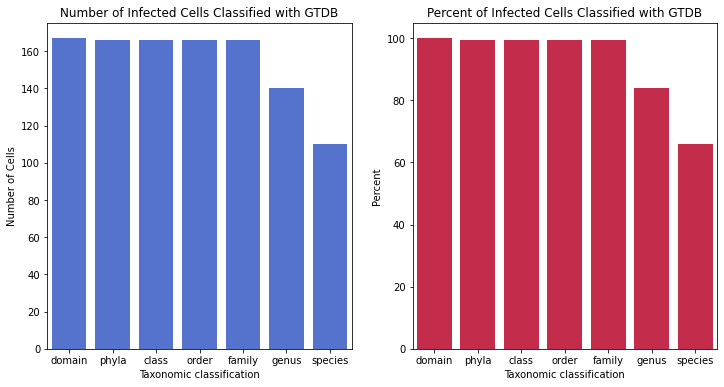

In [3]:
''' infected cells '''

virus_level_counts = [] # set up empty level counts string

levels = ['domain','phyla','class','order','family','genus','species'] # create a levels list

# for loop that counts how many were classified using the count_classified function created above
for level in levels:
    virus_lcount = count_classified(virus_hosts, level)
    print('There are', virus_lcount, 'cells annotated to', level,".") 
    virus_level_counts.append(virus_lcount)

# create a dictionary with the number classified for each level
virus_tax_dict = {'tax_level': levels, 'num_cells_classified': virus_level_counts} 

# create a dataframe from the dictionary
virus_tax_df = pd.DataFrame(data = virus_tax_dict)

# calculate total number of cells classified
virus_tot = len(virus_hosts)

# add an percent column
virus_tax_df['percent_classified'] = virus_tax_df['num_cells_classified']/virus_tot*100

# add a type column
virus_tax_df['type'] = 'Infected'

print(virus_tax_df)

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 6), sharex=True)

sns.barplot(x = 'tax_level', y= 'num_cells_classified', data = virus_tax_df, color= 'royalblue', ax = axes[0])
axes[0].set_xlabel('Taxonomic classification')
axes[0].set_ylabel('Number of Cells')
axes[0].set_title('Number of Infected Cells Classified with GTDB')

sns.barplot(x = 'tax_level', y= 'percent_classified', data = virus_tax_df, color = 'crimson', ax = axes[1])
axes[1].set_xlabel('Taxonomic classification')
axes[1].set_ylabel('Percent')
axes[1].set_title('Percent of Infected Cells Classified with GTDB')

This figure shows the number of infected cells classified in both raw counts (on the left in blue) and percentages (on the right in red) for all of the taxonomic levels. For both of these plots, the taxonomic levels are on the x-axis and either the number or percentage of cells classified on the right axis. Of all of the infected cells with classified hosts, the majority of them were classfied down to the species level. 

There are 376 cells annotated to domain .
There are 369 cells annotated to phyla .
There are 369 cells annotated to class .
There are 367 cells annotated to order .
There are 358 cells annotated to family .
There are 283 cells annotated to genus .
There are 168 cells annotated to species .
  tax_level  num_cells_classified  percent_classified        type
0    domain                   376          100.000000  Uninfected
1     phyla                   369           98.138298  Uninfected
2     class                   369           98.138298  Uninfected
3     order                   367           97.606383  Uninfected
4    family                   358           95.212766  Uninfected
5     genus                   283           75.265957  Uninfected
6   species                   168           44.680851  Uninfected


Text(0.5, 1.0, 'Percent of Uninfected Cells Classified with GTDB')

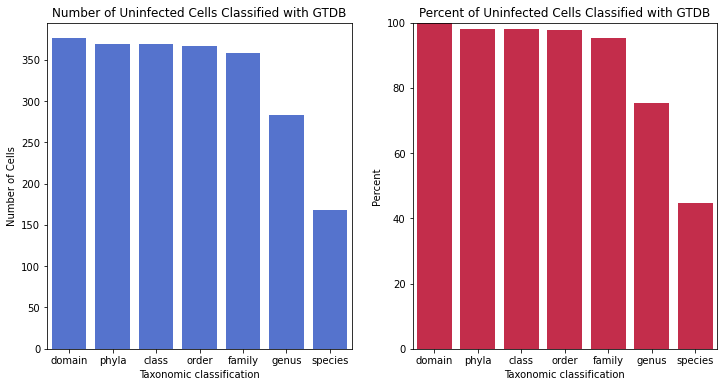

In [4]:
''' uninfected cells '''

uninfect_level_counts = [] # set up empty level counts string

levels = ['domain','phyla','class','order','family','genus','species'] # create a levels list

# for loop that counts how many were classified using the count_classified function created above
for level in levels:
    uninfect_lcount = count_classified(uninfect_mags, level)
    print('There are', uninfect_lcount, 'cells annotated to', level,".") 
    uninfect_level_counts.append(uninfect_lcount)

# create a dictionary with the number classified for each level
uninfect_tax_dict = {'tax_level': levels, 'num_cells_classified': uninfect_level_counts} 

# create a dataframe from the dictionary
uninfect_tax_df = pd.DataFrame(data = uninfect_tax_dict)

# calculate total number of cells classified
uninfect_tot = len(uninfect_mags)

# add an percent column
uninfect_tax_df['percent_classified'] = uninfect_tax_df['num_cells_classified']/uninfect_tot*100

# add a type column
uninfect_tax_df['type'] = 'Uninfected'

print(uninfect_tax_df)

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 6), sharex=True)

sns.barplot(x = 'tax_level', y= 'num_cells_classified', data = uninfect_tax_df, color= 'royalblue', ax = axes[0])
axes[0].set_xlabel('Taxonomic classification')
axes[0].set_ylabel('Number of Cells')
axes[0].set_title('Number of Uninfected Cells Classified with GTDB')

sns.barplot(x = 'tax_level', y= 'percent_classified', data = uninfect_tax_df, color = 'crimson', ax = axes[1])
axes[1].set_xlabel('Taxonomic classification')
axes[1].set_ylabel('Percent')
axes[1].set_ylim(0,100)
axes[1].set_title('Percent of Uninfected Cells Classified with GTDB')


This figure shows the number of uninfected cells classified in both raw counts (on the left in blue) and percentages (on the right in red) for all of the taxonomic levels. For both of these plots, the taxonomic levels are on the x-axis and either the number or percentage of cells classified on the right axis. Of all of the uninfected cells with classified hosts, about half of them were classfied down to the species level. 

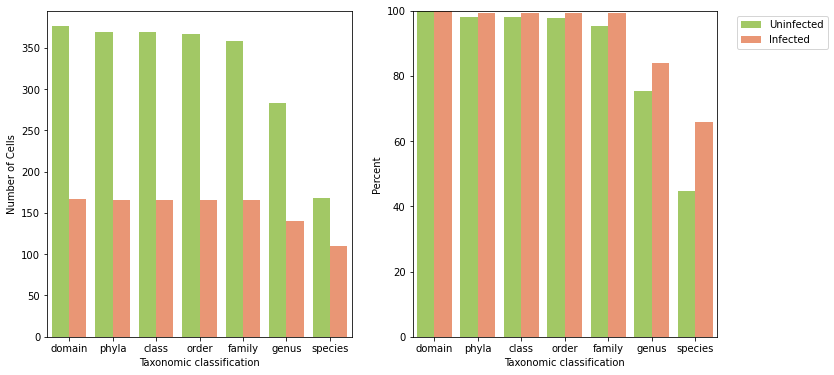

In [5]:
classified_plot = pd.concat([uninfect_tax_df,virus_tax_df])

custom_palette = {'Uninfected': '#a6d854', 'Infected': '#fc8d62'}

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 6), sharex=True)

sns.barplot(x = 'tax_level', y= 'num_cells_classified', data = classified_plot, palette=custom_palette, hue='type', ax = axes[0])
axes[0].set_xlabel('Taxonomic classification')
axes[0].set_ylabel('Number of Cells')
axes[0].get_legend().remove()

sns.barplot(x = 'tax_level', y= 'percent_classified', data = classified_plot, palette=custom_palette, hue='type', ax = axes[1])
axes[1].set_xlabel('Taxonomic classification')
axes[1].set_ylabel('Percent')
axes[1].set_ylim(0,100)
plt.legend(title='', bbox_to_anchor=(1.05, 1), loc='upper left')

Even though there are a higher number of uninfected cells classified, there is a higher percentage of infected cells classified for all of the taxonomic levels.

### Most abundant classifications

Infected Top Phylum: ['Planctomycetota', 'Pseudomonadota', 'Acidobacteriota', 'Cyanobacteriota', 'Verrucomicrobiota', 'Patescibacteria', 'Actinomycetota', 'Myxococcota_A', 'Armatimonadota', 'Nitrospinota']
----------------------------------------------------------------------------------------------------
Infected Top Classes: ['Planctomycetia', 'Gammaproteobacteria', 'Cyanobacteriia', 'Vicinamibacteria', 'Verrucomicrobiae', 'Acidimicrobiia', 'Alphaproteobacteria', 'UBA9160', 'UBA5377', 'Paceibacteria']
----------------------------------------------------------------------------------------------------
Infected Top Orders: ['Pirellulales', 'Arenicellales', 'PCC-6307', 'Vicinamibacterales', 'Verrucomicrobiales', 'UBA9160', 'UBA5377', 'Acidimicrobiales', 'Caulobacterales', 'CAJXCL01']


Text(0.5, 1.0, 'Top 10 Most Abundant Orders')

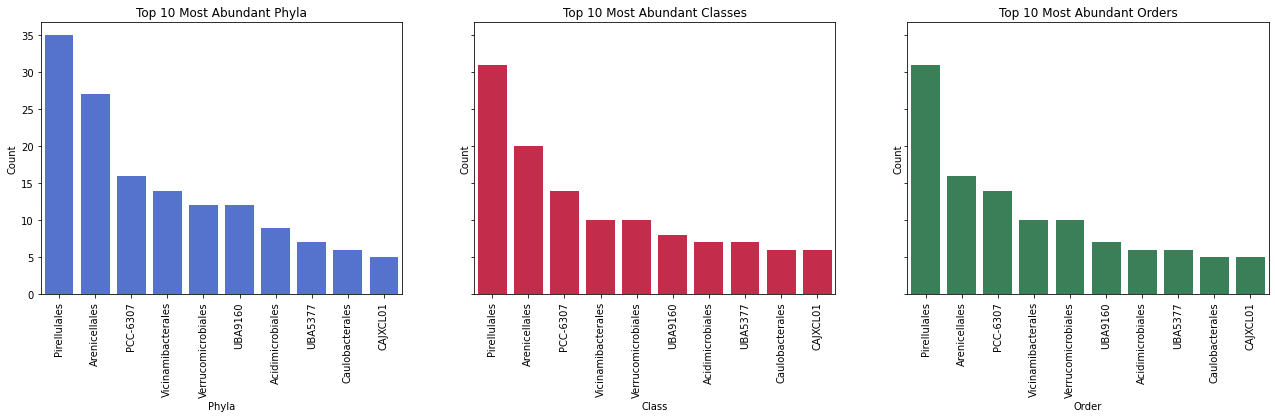

In [6]:
''' infected '''

# create a list of taxonomy columns
tax_cols = ['domain', 'phyla','class','order','family','genus','species']

# create an empty dictionary
virus_top_dict = {}

# for loop to create a list of the 10 most abundant taxonomic groups for each level of classification
for column in tax_cols:
    virus_most_common = virus_hosts[column].value_counts().head(10).index.tolist()
    virus_top_dict[column] = virus_most_common

# create a list using the corresponding column of the mag_top_dict
virus_phyla_list = virus_top_dict['phyla']
virus_class_list = virus_top_dict['class']
virus_order_list = virus_top_dict['order']

print('Infected Top Phylum:', virus_phyla_list)
print("-" * 100)  # Print a line of hyphens as a separator
print('Infected Top Classes:', virus_class_list)
print("-" * 100)  # Print a line of hyphens as a separator
print('Infected Top Orders:', virus_order_list)

# subset out observations belonging to the top phylum from the infected cells (virus) dataframe
virus_phyla_df = virus_hosts[virus_hosts['phyla'].isin(virus_phyla_list)]

# subset out observations belonging to the top classes from the infected cells (virus) dataframe
virus_class_df = virus_hosts[virus_hosts['class'].isin(virus_class_list)]

# subset out observations beloning to the top classes from teh infected cells (virus) dataframe
virus_order_df = virus_hosts[virus_hosts['order'].isin(virus_order_list)]

virus_phyla_plot = pd.DataFrame(virus_phyla_df['phyla'].value_counts())
virus_phyla_plot.rename(columns={'phyla':'count'},inplace=True)
virus_phyla_plot['phyla'] = virus_phyla_plot.index

virus_class_plot = pd.DataFrame(virus_class_df['class'].value_counts())
virus_class_plot.rename(columns={'class':'count'},inplace=True)
virus_class_plot['class'] = virus_class_plot.index

virus_order_plot = pd.DataFrame(virus_order_df['order'].value_counts())
virus_order_plot.rename(columns={'order':'count'},inplace=True)
virus_order_plot['order'] = virus_order_plot.index


fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(22, 5), sharex=True, sharey=True)

for ax in axes: # for loop to change all plots to have rotated text on the x-axis by 90 degrees
    ax.tick_params(axis='x', rotation=90)

sns.barplot(x = 'phyla', y= 'count', data = virus_phyla_plot, color = 'royalblue', ax = axes[0])
axes[0].set_xlabel('Phyla')
axes[0].set_ylabel('Count')
axes[0].set_title('Top 10 Most Abundant Phyla')

sns.barplot(x = 'class', y= 'count', data = virus_class_plot, color = 'crimson', ax = axes[1])
axes[1].set_xlabel('Class')
axes[1].set_ylabel('Count')
axes[1].set_title('Top 10 Most Abundant Classes')

sns.barplot(x = 'order', y= 'count', data = virus_order_plot, color = 'seagreen', ax = axes[2])
axes[2].set_xlabel('Order')
axes[2].set_ylabel('Count')
axes[2].set_title('Top 10 Most Abundant Orders')

This figure shows the abundance of the top ten phylum (left, blue), classes (middle, red), and orders (right, green) of the infected proximeta cells. Each classification is on the x-axis and count is on the y-axis.

Uninfected Top Phylum: ['Pseudomonadota', 'Patescibacteria', 'Chloroflexota', 'Planctomycetota', 'Acidobacteriota', 'Thermoproteota', 'Actinomycetota', 'Nanoarchaeota', 'Marinisomatota', 'Thermoplasmatota']
----------------------------------------------------------------------------------------------------
Uninfected Top Classes: ['Gammaproteobacteria', 'Alphaproteobacteria', 'Dehalococcoidia', 'ABY1', 'Nitrososphaeria', 'Nanoarchaeia', 'Paceibacteria', 'Acidimicrobiia', 'Phycisphaerae', 'Marinisomatia']
----------------------------------------------------------------------------------------------------
Uninfected Top Orders: ['Arenicellales', 'Nitrososphaerales', 'Acidimicrobiales', 'Phycisphaerales', 'Dehalococcoidales', 'Magasanikbacterales', 'Marinisomatales', 'Anaerolineales', 'Paceibacterales', 'Vicinamibacterales']


Text(0.5, 1.0, 'Top 10 Most Abundant Orders')

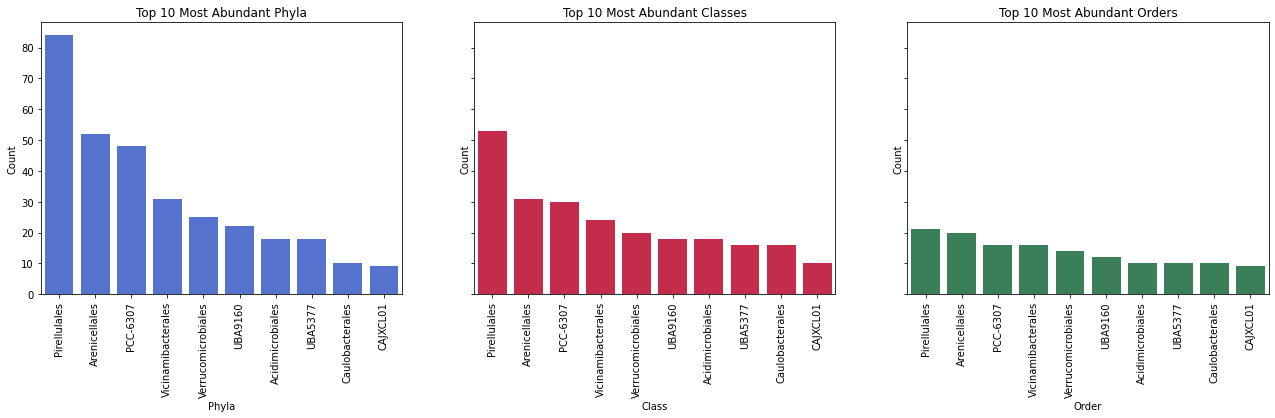

In [7]:
''' uninfected '''

# create a list of taxonomy columns
tax_cols = ['domain', 'phyla','class','order','family','genus','species']

# create an empty dictionary
uninfect_top_dict = {}

# for loop to create a list of the 10 most abundant taxonomic groups for each level of classification
for column in tax_cols:
    uninfect_most_common = uninfect_mags[column].value_counts().head(10).index.tolist()
    uninfect_top_dict[column] = uninfect_most_common

# create a list using the corresponding column of the mag_top_dict
uninfect_phyla_list = uninfect_top_dict['phyla']
uninfect_class_list = uninfect_top_dict['class']
uninfect_order_list = uninfect_top_dict['order']

print('Uninfected Top Phylum:', uninfect_phyla_list)
print("-" * 100)  # Print a line of hyphens as a separator
print('Uninfected Top Classes:', uninfect_class_list)
print("-" * 100)  # Print a line of hyphens as a separator
print('Uninfected Top Orders:', uninfect_order_list)

# subset out observations belonging to the top phylum from the infected cells (virus) dataframe
uninfect_phyla_df = uninfect_mags[uninfect_mags['phyla'].isin(uninfect_phyla_list)]

# subset out observations belonging to the top classes from the infected cells (virus) dataframe
uninfect_class_df = uninfect_mags[uninfect_mags['class'].isin(uninfect_class_list)]

# subset out observations beloning to the top classes from teh infected cells (virus) dataframe
uninfect_order_df = uninfect_mags[uninfect_mags['order'].isin(uninfect_order_list)]

uninfect_phyla_plot = pd.DataFrame(uninfect_phyla_df['phyla'].value_counts())
uninfect_phyla_plot.rename(columns={'phyla':'count'},inplace=True)
uninfect_phyla_plot['phyla'] = uninfect_phyla_plot.index

uninfect_class_plot = pd.DataFrame(uninfect_class_df['class'].value_counts())
uninfect_class_plot.rename(columns={'class':'count'},inplace=True)
uninfect_class_plot['class'] = uninfect_class_plot.index

uninfect_order_plot = pd.DataFrame(uninfect_order_df['order'].value_counts())
uninfect_order_plot.rename(columns={'order':'count'},inplace=True)
uninfect_order_plot['order'] = virus_order_plot.index


fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(22, 5), sharex=True, sharey=True)

for ax in axes: # for loop to change all plots to have rotated text on the x-axis by 90 degrees
    ax.tick_params(axis='x', rotation=90)

sns.barplot(x = 'phyla', y= 'count', data = uninfect_phyla_plot, color = 'royalblue', ax = axes[0])
axes[0].set_xlabel('Phyla')
axes[0].set_ylabel('Count')
axes[0].set_title('Top 10 Most Abundant Phyla')

sns.barplot(x = 'class', y= 'count', data = uninfect_class_plot, color = 'crimson', ax = axes[1])
axes[1].set_xlabel('Class')
axes[1].set_ylabel('Count')
axes[1].set_title('Top 10 Most Abundant Classes')

sns.barplot(x = 'order', y= 'count', data = uninfect_order_plot, color = 'seagreen', ax = axes[2])
axes[2].set_xlabel('Order')
axes[2].set_ylabel('Count')
axes[2].set_title('Top 10 Most Abundant Orders')

This figure shows the abundance of the top ten phylum (left, blue), classes (middle, red), and orders (right, green) of the infected proximeta cells. Each classification is on the x-axis and count is on the y-axis.

In [ ]:
# plot of just order (same as above, for presentation)
sns.barplot(x = 'order', y= 'count', data = uninfect_order_plot, color = 'seagreen')
plt.xlabel('Order')
plt.ylabel('Count')
plt.title('Top 10 Most Abundant Orders')
plt.tick_params(axis='x', rotation=90)

infected/uninfected phylum in common ['Planctomycetota', 'Pseudomonadota', 'Patescibacteria', 'Acidobacteriota', 'Actinomycetota']
----------------------------------------------------------------------------------------------------
infected/uninfected phylum in common ['Paceibacteria', 'Alphaproteobacteria', 'Acidimicrobiia', 'Gammaproteobacteria']
----------------------------------------------------------------------------------------------------
infected/uninfected phylum in common ['Vicinamibacterales', 'Arenicellales', 'Acidimicrobiales']


Text(0.5, 1.0, 'Common Most Abundant Orders')

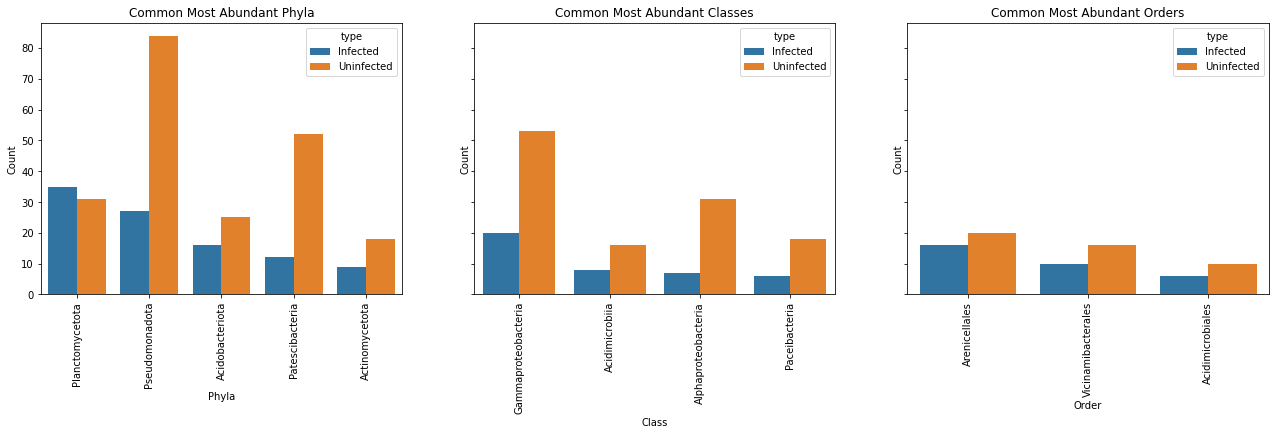

In [17]:
# compare classifications

common_phyla_list = list(set(virus_phyla_list) & set(uninfect_phyla_list))
common_class_list = list(set(virus_class_list) & set(uninfect_class_list))
common_order_list = list(set(virus_order_list) & set(uninfect_order_list))

print('infected/uninfected phylum in common', common_phyla_list)
print("-" * 100)  # Print a line of hyphens as a separator
print('infected/uninfected classes in common', common_class_list)
print("-" * 100)  # Print a line of hyphens as a separator
print('infected/uninfected orders in common',common_order_list)

virus_common_phyla = virus_phyla_plot[virus_phyla_plot['phyla'].isin(common_phyla_list)]
virus_common_class = virus_class_plot[virus_class_plot['class'].isin(common_class_list)]
virus_common_order = virus_order_plot[virus_order_plot['order'].isin(common_order_list)]

uninfect_common_phyla = uninfect_phyla_plot[uninfect_phyla_plot['phyla'].isin(common_phyla_list)]
uninfect_common_class = uninfect_class_plot[uninfect_class_plot['class'].isin(common_class_list)]
uninfect_common_order = uninfect_order_plot[uninfect_order_plot['order'].isin(common_order_list)]

for df in list([virus_common_phyla, virus_common_class, virus_common_order]):
    df['type'] = 'Infected'
    
for df in list([uninfect_common_phyla, uninfect_common_class, uninfect_common_order]):
    df['type'] = 'Uninfected'
    
common_phyla_plot = pd.concat([virus_common_phyla, uninfect_common_phyla])
common_class_plot = pd.concat([virus_common_class, uninfect_common_class])
common_order_plot = pd.concat([virus_common_order, uninfect_common_order])


# plot abundances for common classifications
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(22, 5), sharey=True)

for ax in axes: # for loop to change all plots to have rotated text on the x-axis by 90 degrees
    ax.tick_params(axis='x', rotation=90)

sns.barplot(x = 'phyla', y= 'count', data = common_phyla_plot, hue='type', ax = axes[0])
axes[0].set_xlabel('Phyla')
axes[0].set_ylabel('Count')
axes[0].set_title('Common Most Abundant Phyla')

sns.barplot(x = 'class', y= 'count', data = common_class_plot, hue='type', ax = axes[1])
axes[1].set_xlabel('Class')
axes[1].set_ylabel('Count')
axes[1].set_title('Common Most Abundant Classes')

sns.barplot(x = 'order', y= 'count', data = common_order_plot, hue='type', ax = axes[2])

axes[2].set_xlabel('Order')
axes[2].set_ylabel('Count')
axes[2].set_title('Common Most Abundant Orders')

## Depth Analysis

## Create color maps

In [ ]:
# create a list of colors
phyla_color_list = ['lightgreen', 'mediumseagreen', 'c', 'cadetblue', 'mediumpurple', 'plum', 'lightsalmon', 'orange', 'goldenrod', 'tan']
# create a dictionary/color map
phyla_color_map = dict(zip(phyla_list, phyla_color_list))

class_color_list = ['hotpink','r', 'crimson', 'darkred', 'chocolate', 'brown', 'rosybrown', 'mediumvioletred', 'pink', 'violet', 'lightgrey', 'dimgrey']
class_color_map = dict(zip(class_list, class_color_list))

order_color_list = ['lightskyblue', 'steelblue', 'dodgerblue', 'forestgreen', 'limegreen', 'darkolivegreen', 'mediumslateblue', 'saddlebrown', 'orchid', 'lightslategray', 'yellowgreen', 'turquoise', 'teal']
order_color_map = dict(zip(order_list, order_color_list))

In [ ]:
# old code
phyla_color = ['lightgreen', 'mediumseagreen', 'c', 'cadetblue', 'mediumpurple', 'plum', 'lightsalmon', 'orange', 'goldenrod', 'tan']
phyla_list = ['Acidobacteriota', 'Chloroflexota', 'Cyanobacteriota', 'Marinisomatota', 'Patescibacteria', 'Planctomycetota', 'Proteobacteria', 'Pseudomonadota',
              'SAR324', 'Thermoplasmatota']
phyla_color_map = dict(zip(phyla_list, phyla_color))

class_color = ['hotpink','r', 'crimson', 'darkred', 'chocolate', 'brown', 'rosybrown', 'mediumvioletred', 'pink', 'violet', 'lightgrey', 'dimgrey']
class_list = ['ABY1', 'Acidimicrobiia', 'Alphaproteobacteria', 'Cyanobacteriia', 'Dehalococcoidia', 'Gammaproteobacteria', 'Marinisomatia', 'Paceibacteria',
              'Planctomycetia', 'Poseidoniia', 'SAR324', 'Vicinamibacteria']
class_color_map = dict(zip(class_list, class_color))

order_color = ['lightskyblue', 'steelblue', 'dodgerblue', 'forestgreen', 'limegreen', 'darkolivegreen', 'mediumslateblue', 'saddlebrown', 'orchid',
               'lightslategray', 'yellowgreen', 'turquoise', 'teal']
order_list = ['Acidimicrobiales', 'Arenicellales', 'HIMB59', 'Marinisomatales', 'Nitrososphaerales', 'PCC-6307', 'Pelagibacterales', 'Phycisphaerales',
              'Pirellulales', 'SCGC-AAA003-L08', 'UBA11654', 'Verrucomicrobiales', 'Vicinamibacterales']
order_color_map = dict(zip(order_list, order_color))

## Plot tax level

In [ ]:
# create a an empty list named plot_order
plot_order = []

# for loop to add values into the empty list
for item in mag_gtdb['order']: # for each item in the order column of the mag_gtdb dataframe
    if item in order_list: # if the item is in the list order_list
        plot_order.append(item) # add that item to the plot_order list
    else: # if the item is not in order_list
        plot_order.append('Other') # add 'Other' to the plot_order list

mag_gtdb['plot_order'] = plot_order # create a column named plot_order in the mag_gtdb database that is the plot_order list

In [ ]:
# alternative: list comprehension solution
# mag_gtdb['plot_order'] = [item if item in order_list else 'Other' for item in mag_gtdb['plot_order']]

In [ ]:
# group the mag_gtdb dataframe by sample_depth and plot_order and then count the number of each grouping and pivot the resulting dataframe
order_counts = mag_gtdb.groupby(['sample_depth', 'plot_order'], as_index = False)['user_genome'].count().pivot(columns = 'plot_order', index = 'sample_depth', values = 'user_genome')

# create a list of the order of columns for plotting
col_order = ['Other'] + order_list

# turn count values into percents
order_pcts = order_counts.div(order_counts.sum(axis=1), axis=0)
order_pcts = round(order_pcts * 100, 1)

In [ ]:
# stacked barplot of order counts
sns.set_palette("colorblind")
order_counts[col_order].plot.bar(stacked = True)
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.title('Count')
plt.xlabel('Sample Depth')
plt.ylabel('Number of Individuals')

In [ ]:
# stacked bar plot of order percents
sns.set_palette("colorblind")
order_pcts[col_order].plot.bar(stacked = True)
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.ylabel('Percent')
plt.xlabel('Sample Depth')
plt.title('Percent')